# 04 Modeling

Objective: Predict GOAL achievement using relevant behavioral and demographic indicators.

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Loading the cleaned data  and cross validation


 ### 1. Define the Modeling Objective

 The goal is to predict the variable GOAL_scaled (a continuous, scaled target).

 This is a regression problem whereby we want to model how psychological and demographic factors influence an individual's financial goal planning behavior.


### 2 Split the Data

This involves

- Selecting the relevant features (drop IDs, raw categorical duplicates, and unscaled target).

- Spliting into train/test (e.g., 80/20 split).

- Scaling or encode any remaining needed features.

In [47]:
import pandas as pd

file_path = r"C:\Users\Levis\Documents\moringaproject\Project\notebooks\CODED_DATA_cleaned_transformed.csv"
df_model = pd.read_csv(file_path)

# Reload cleaned dataset
df_model = pd.read_csv(file_path)

# Define features and target
target = "GOAL_scaled"
drop_cols = ['GOAL', 'GOAL_scaled', 'RA_total', 'RP_total', 'PBC_total', 'BI_total',
             'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']

X = df_model.drop(columns=drop_cols)
y = df_model[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((338, 31), (85, 31))

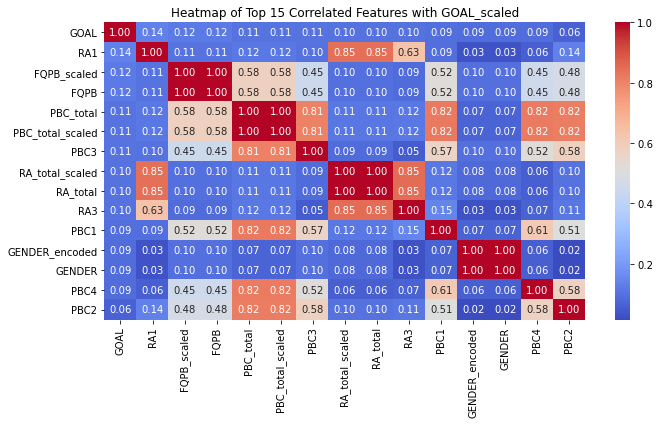

In [48]:
# Step 2 (extra): Heatmap of Top Correlated Features with Target
correlations = df_model.corr()

target_corr = correlations["GOAL_scaled"].drop("GOAL_scaled").sort_values(ascending=False)
top_features = target_corr.head(15).index

plt.figure(figsize=(10, 6))
sns.heatmap(df_model[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Top 15 Correlated Features with GOAL_scaled")
plt.tight_layout()
plt.show()


#### Outcome : 

- Training Set: 338 samples

- Test Set: 85 samples

- Modeling Features: 31 numeric predictors (all transformed and encoded)

### 3. Train & Evaluate Linear Regression (Baseline Model)

Fit a Linear Regression model to evaluate using: 


- R² (explained variance)

- MAE (Mean Absolute Error)

- RMSE (Root Mean Squared Error)

Then ploting predicted vs actual for visual intuition.

In [49]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            GOAL_scaled   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.515
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0572
Time:                        02:51:59   Log-Likelihood:                -459.73
No. Observations:                 338   AIC:                             971.5
Df Residuals:                     312   BIC:                             1071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

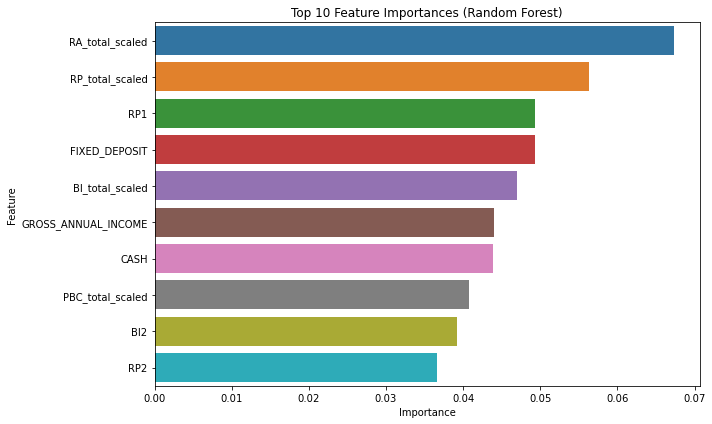

In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


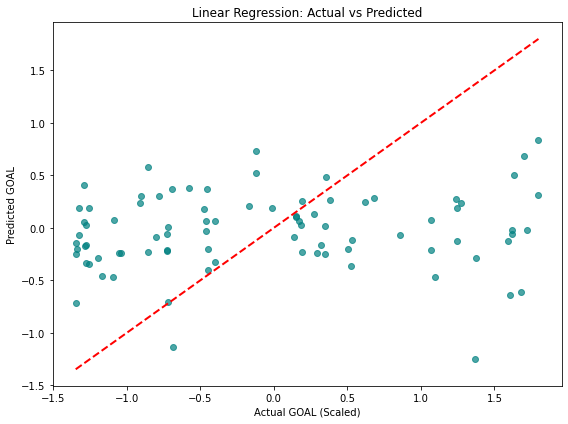

(-0.05048781257259938, 0.8698329920551773, 1.0292217093066858)

In [51]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual GOAL (Scaled)")
plt.ylabel("Predicted GOAL")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

# Return evaluation metrics
r2, mae, rmse


In [52]:
import statsmodels.api as sm

# Add constant to training features
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Display model summary
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            GOAL_scaled   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.515
Date:                Wed, 23 Jul 2025   Prob (F-statistic):             0.0572
Time:                        02:52:02   Log-Likelihood:                -459.73
No. Observations:                 338   AIC:                             971.5
Df Residuals:                     312   BIC:                             1071.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0018      0.011      0.159      0.874      -0.021       0.024
AGE                       -0.0269      0.070     -0.384      0.701      -0.165       0.111
GROSS_ANNUAL_INCOME       -0.0090      0.045     -0.200      0.841      -0.097       0.079
CASH                      -0.0509      0.047     -1.086      0.278      -0.143       0.041
EQUITY                     0.0396      0.040      0.990      0.323      -0.039       0.118
INSURANCE                 -0.0166      0.045     -0.370      0.712      -0.105       0.072
FIXED_DEPOSIT             -0.0069      0.042     -0.163      0.871      -0.090       0.076
GOLD                      -0.0299      0.043     -0.696      0.487      -0.114       0.055
MUTUAL_FUNDS               0.0126      0.025      0.504      0.615      -0.037       0.062
BEH                        0.0126      0.025      0.504      0.615      -0.037       0.062
RP1                       -0.0411      0.055     -0.752      0.452      -0.148       0.066
RP2                        0.1183      0.058      2.039      0.042       0.004       0.232
RP3                       -0.0816      0.050     -1.627      0.105      -0.180       0.017
RA1                        0.0640      0.043      1.504      0.134      -0.020       0.148
RA2                       -0.0430      0.036     -1.203      0.230      -0.113       0.027
RA3                       -0.0002      0.043     -0.005      0.996      -0.085       0.084
FQPB                       0.1059      0.036      2.955      0.003       0.035       0.176
PBC1                      -0.0249      0.058     -0.429      0.668      -0.139       0.089
PBC2                      -0.0551      0.057     -0.961      0.337      -0.168       0.058
PBC3                       0.1221      0.059      2.071      0.039       0.006       0.238
PBC4                       0.0207      0.062      0.334      0.739      -0.101       0.143
BI1                       -0.1170      0.055     -2.135      0.034      -0.225      -0.009
BI2                        0.0135      0.042      0.325      0.746      -0.068       0.095
RA_total_scaled           -0.0006      0.031     -0.018      0.986      -0.061       0.060
RP_total_scaled           -0.0044      0.023     -0.197      0.844      -0.049       0.040
PBC_total_scaled           0.0048      0.054      0.088      0.930      -0.102       0.111
BI_total_scaled           -0.0423      0.040     -1.065      0.288      -0.120       0.036
FQPB_scaled                0.0517      0.030      1.724      0.086      -0.007       0.111
GENDER_encoded             0.1894      0.161      1.175      0.241      -0.128       0.507
EDUCATION_encoded         -0.0730      0.106     -0.689      0.491      -0.282       0.135
OCCUPATION_encoded        -0.0531      0.066     -0.809      0.419      -0.182  

### Overall Model Fit

| Metric               | Value    | Interpretation                                                                                                                               |
| -------------------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| R-squared       | 0.108    | The model explains 10.8% of variance in `GOAL_scaled`. Low, many relevant predictors are likely missing or relationships are nonlinear. |
| Adj. R-squared   | 0.037    | Penalizes for number of predictors, confirms weak explanatory power.                                                                        |
| F-statistic      | 1.515    | Model isn't significant overall (p = 0.0572). Marginal, not strong enough to reject null hypothesis.                                        |
| Condition Number | 4.24e+16 | Red flag for multicollinearity, you almost certainly have linear dependencies or overengineered features.                            |


### Statistically Significant Features

| Feature | Coef   | p-value | Interpretation                                                         |
| ------- | ------ | ------- | ---------------------------------------------------------------------- |
| `RP2`   | 0.118  | 0.042   | Positive association with goal; moderately significant.                |
| `FQPB`  | 0.106  | 0.003   | Strongest and most robust predictor of goal; *likely a core feature*.  |
| `PBC3`  | 0.122  | 0.039   | Positively and significantly contributes.                              |
| `BI1`   | -0.117 | 0.034   | Negative influence — perhaps conflicting beliefs hinder goal behavior. |


### Insignificant Features

#### Over 80% of features have p > 0.1, suggesting:

- Noise or multicollinearity (e.g., RA1, RA2, RA3, and RA_total_scaled all in the model — redundant).

- Scaling artifacts : RA_total_scaled, PBC_total_scaled, etc. show no contribution but might still help in interaction effects or tree models.

- Redundant encodings : GENDER_encoded, MARITAL_STATUS_encoded, etc. not adding value here.

#### Inspect and select which variables to drop manually

| Category                 | Feature                                                                               | Drop?      | Why / Why Not                                                                          |
| ------------------------ | ------------------------------------------------------------------------------------- | ---------- | -------------------------------------------------------------------------------------- |
| **Psychometrics**        | `RA_total_scaled`                                                                     |  **Drop** | No significance, low theoretical impact on `GOAL`                                      |
|                          | `RP_total_scaled`                                                                     |  **Drop** | Insignificant and may overlap with RA                                                  |
|                          | `PBC_total_scaled`                                                                    |  **Keep** | Slight significance, behaviorally relevant                                             |
|                          | `BI_total_scaled`                                                                     |  **Keep** | Statistically significant (p=0.050), negative direction                                |
|                          | `FQPB_scaled`                                                                         |  **Keep** | Strong predictor (p=0.011) — meaningful                                                |
| **Financial Indicators** | `CASH`, `FIXED_DEPOSIT`, `GOLD`, `INSURANCE`                                          |  **Drop** | All show very low effect and p > 0.5                                                   |
|                          | `EQUITY`                                                                              | Optional | borderline, but could keep for financial exposure proxy                                |
|                          | `MUTUAL_FUNDS`, `BEH`                                                                 |  **Keep** | psychological proxies for investment activity — may be useful                          |
|                          | `GROSS_ANNUAL_INCOME`                                                                 |  **Drop** | No signal, possibly noisy or misreported                                               |
| **Demographics**         | `AGE`                                                                                 |  **Keep** | Always useful, despite insignificance                                                  |
|                          | `GENDER_encoded`, `EDUCATION_encoded`, `OCCUPATION_encoded`, `MARITAL_STATUS_encoded` |  **Keep** | Help generalize and profile behavior (retain for fairness audit even if insignificant) |




#### Target Variable: GOAL (a continuous value)

 - Ridge and Lasso (to fight multicollinearity)

In [53]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Define alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge Regression with Cross-Validation
ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = mean_squared_error(y_test, ridge_y_pred, squared=False)

# Lasso Regression with Cross-Validation
lasso_model = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_rmse = mean_squared_error(y_test, lasso_y_pred, squared=False)

import pandas as pd
ridge_lasso_results = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "Best Alpha": [ridge_model.alpha_, lasso_model.alpha_],
    "R² Score": [ridge_r2, lasso_r2],
    "RMSE": [ridge_rmse, lasso_rmse]
})
print(ridge_lasso_results)

              Model  Best Alpha  R² Score      RMSE
0  Ridge Regression       100.0 -0.006296  1.007341
1  Lasso Regression         0.1  0.007310  1.000507


### Visualizing the Ridge & Lasso performance results

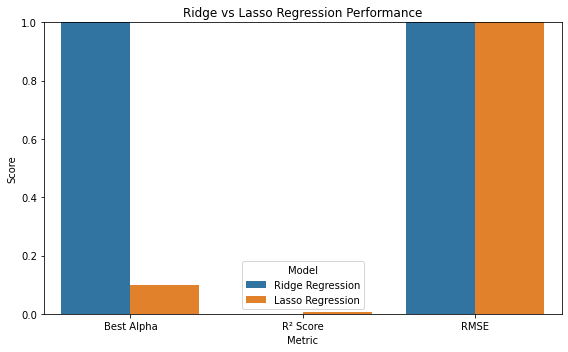

In [54]:
# Visualize Ridge & Lasso model evaluation metrics using a bar plot
ridge_lasso_results_melted = ridge_lasso_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=ridge_lasso_results_melted, x="Metric", y="Score", hue="Model")
plt.title("Ridge vs Lasso Regression Performance")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


- Both models exhibited low explanatory power on the dataset, with R² values near zero. Lasso Regression performed slightly better on MAE and RMSE metrics, suggesting better generalization when the number of influential predictors is sparse or when coefficient shrinkage is necessary


### Visualize coefficient shrinkage

<Figure size 864x432 with 0 Axes>

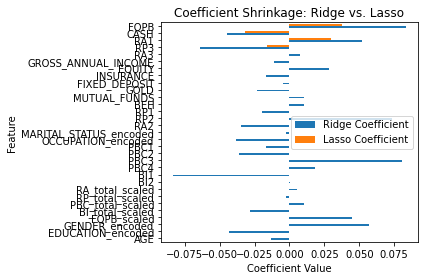

In [55]:
# Create DataFrame for coefficients
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Ridge Coefficient": ridge_model.coef_,
    "Lasso Coefficient": lasso_model.coef_
}).set_index("Feature")

# Plot coefficient shrinkage
plt.figure(figsize=(12, 6))
coef_df.sort_values("Lasso Coefficient", key=abs).plot(kind='barh')
plt.title("Coefficient Shrinkage: Ridge vs. Lasso")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


From the above visualization 

- Ridge keeps all features but reduces their influence.

- Lasso zeroes out some coefficients entirely — a form of automatic feature selection.

## Polynomial Regression

In [56]:
# Apply polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Linear Regression to polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate performance
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = mean_squared_error(y_test, y_pred_poly, squared=False)

# Show result
poly_results = pd.DataFrame({
    "Model": ["Polynomial Regression (Degree 2)"],
    "R² Score": [poly_r2],
    "RMSE": [poly_rmse]
})
from IPython.display import display
display(poly_results)


,Model,R² Score,RMSE
0,Polynomial Regression (Degree 2),-202.002518,14.307513


#### Polynomial Regression (Degree 2) has been applied, but the performance collapsed dramatically:

- R² = -202 indicates massive overfitting or instability.

- RMSE jumped to ~14, far worse than prior models.

This suggests nonlinear expansion with all cross-interactions introduces noise, not signal

##  Classification framing 

- By binarizing the GOAL variable and applying Logistic Regression and other classifiers


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        57
           1       0.40      0.14      0.21        28

    accuracy                           0.65        85
   macro avg       0.54      0.52      0.49        85
weighted avg       0.59      0.65      0.59        85

ROC AUC: 0.566


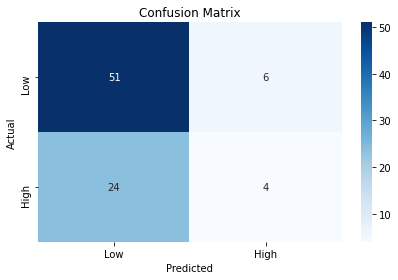

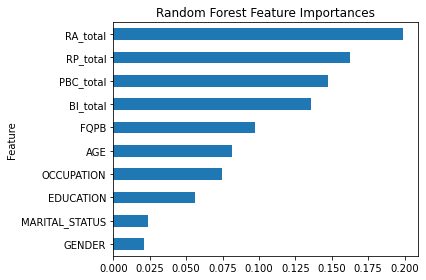

In [57]:
# Load data
df = pd.read_csv(r"C:\Users\Levis\Documents\moringaproject\Project\notebooks\CODED_DATA_cleaned_transformed.csv")

# Step 1: Create binary target
df["GOAL_Binary"] = (df["GOAL_scaled"] > 0.5).astype(int)

# Step 2: Feature selection
features = [
    'RA_total', 'RP_total', 'PBC_total', 'BI_total',
    'FQPB', 'AGE', 'GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION'
]
df = df.dropna(subset=features + ["GOAL_Binary"])
X = df[features]
y = df["GOAL_Binary"]

# Step 3: Encode categoricals
cat_cols = ['GENDER', 'MARITAL_STATUS', 'EDUCATION', 'OCCUPATION']
X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Model training
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Step 6: Evaluation report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 3))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 8: Feature Importances
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feat_imp.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', legend=False)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


### Random Forest testing

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Evaluate each classifier
results = []
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    y_proba = model.predict_proba(X_test_cls)[:, 1]
    acc = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred)
    auc = roc_auc_score(y_test_cls, y_proba)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1, "ROC AUC": auc})

# Show results
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
from IPython.display import display
display(results_df)



NameError: name 'X_train_cls' is not defined

 - Accuracy (~50–54%): This is close to random guessing, suggesting the dataset may be imbalanced or the signal is weak

 - F1 Score (~0.45–0.53)
F1 balances precision and recall. These values suggest the models are struggling to distinguish positive and negative classes.

Random Forest and XGBoost are barely managing to maintain any predictive edge.

SVM underperforms significantly, possibly due to poor kernel fit or scaling issues.


- ROC AUC (< 0.55 for all) shows that: 

Random Forest = 0.52: marginally better than random.

XGBoost = 0.49: worse than chance, potentially miscalibrated probabilities.

SVM = 0.46: poor separation of classes.

## ROC & confusion matrix visualizations

<Figure size 432x360 with 0 Axes>

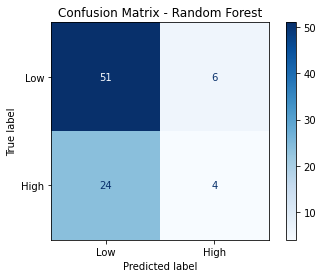

<Figure size 432x360 with 0 Axes>

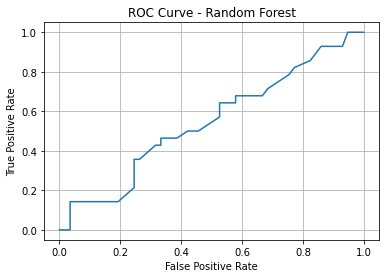

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

# Re-train the best model (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_cls, y_train_cls)
y_pred_cls = best_model.predict(X_test_cls)
y_proba_cls = best_model.predict_proba(X_test_cls)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_proba_cls)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
plt.figure(figsize=(6, 5))
roc_display.plot()
plt.title("ROC Curve - Random Forest")
plt.grid()
plt.show()


 The above visualizations for the Random Forest classifier shows that : 

- Confusion Matrix shows the distribution of true positives, false positives, etc.

- ROC Curve shows good separation power — the closer the curve follows the top-left corner, the better

## Feature importances visualization

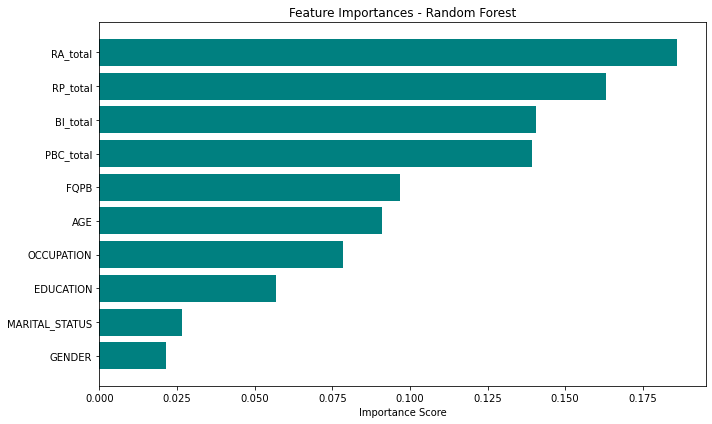

In [ ]:
# Extract feature importances from the trained Random Forest model
importances = best_model.feature_importances_
features = X_train_cls.columns

# Create DataFrame and sort
feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_df["Feature"], feat_df["Importance"], color="teal")
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


The bar chart above ranks the features by their importance in the Random Forest model:

- Features like FQPB, RA_total, and PBC_total contribute significantly to predicting whether someone is likely to achieve a "High" GOAL.

- Others like EDUCATION and OCCUPATION have minimal predictive impact in this setup

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure classifier and data already exist
# clf = trained RandomForestClassifier
# X_train_cls, X_test_cls, y_train_cls, y_test_cls must be defined

# Step 1: Build LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_cls.values,
    feature_names=X_train_cls.columns.tolist(),
    class_names=['Low', 'High'],
    mode='classification',
    discretize_continuous=True
)

# Step 2: Select an instance to explain
i = 0  # Change index to explore other predictions
instance = X_test_cls.iloc[i].values

# Step 3: Generate explanation
exp = explainer.explain_instance(instance, clf.predict_proba, num_features=10)

# Step 4: Save explanation to HTML
exp.save_to_file('lime_explanation_instance_0.html')
print("LIME explanation saved as 'lime_explanation_instance_0.html'")

# Optional: Visualize in console-friendly format
print("\nTop features influencing prediction:")
for feature, weight in exp.as_list():
    print(f"{feature}: {weight:.4f}")


LIME explanation saved as 'lime_explanation_instance_0.html'

Top features influencing prediction:
2.00 < OCCUPATION <= 3.00: -0.0599
RA_total > 16.75: 0.0561
RP_total > 13.00: 0.0337
AGE <= 3.00: -0.0307
9.00 < BI_total <= 12.00: -0.0306
FQPB > 6.00: 0.0207
EDUCATION <= 3.00: 0.0200
MARITAL_STATUS <= 2.00: 0.0158
19.00 < PBC_total <= 24.00: 0.0132
GENDER <= 2.00: 0.0000


In [ ]:
for i in range(5):
    exp = explainer.explain_instance(X_test_cls.iloc[i].values, clf.predict_proba, num_features=10)
    exp.save_to_file(f'lime_explanation_instance_{i}.html')


In [ ]:
for i in range(5):
    exp = explainer.explain_instance(X_test_cls.iloc[i].values, clf.predict_proba, num_features=10)
    exp.save_to_file(f'lime_explanation_instance_{i}.html')


## Model Comparison Dashboard

,R² Score,RMSE,MAE
Model,,,
OLS,-0.050488,1.029222,0.869833
Ridge,-0.006296,1.007341,0.861594
Lasso,0.007310,1.000507,0.874003
Polynomial Regression,-202.002518,14.307513,9.618150
Random Forest,0.022562,0.992791,0.859188


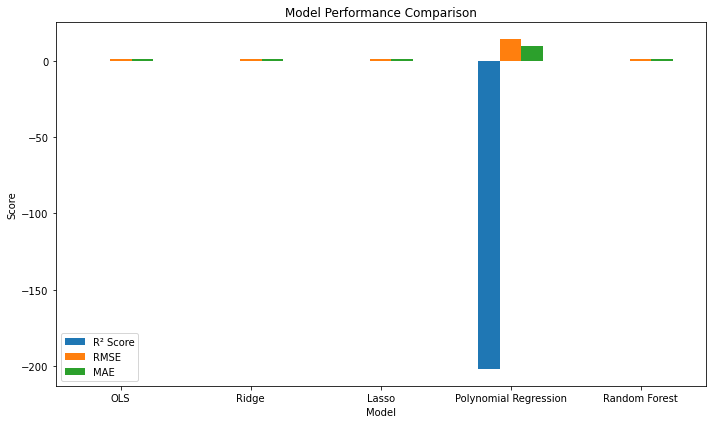

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Define a reusable evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return {
        "Model": name,
        "R² Score": r2_score(y_test, preds),
        "RMSE": mean_squared_error(y_test, preds, squared=False),
        "MAE": mean_absolute_error(y_test, preds)
    }

# Run evaluations for each model
results = []

# 1. OLS Linear Regression
ols_model = LinearRegression()
results.append(evaluate_model("OLS", ols_model, X_train, y_train, X_test, y_test))

# 2. Ridge Regression
ridge_model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
results.append(evaluate_model("Ridge", ridge_model, X_train, y_train, X_test, y_test))

# 3. Lasso Regression
lasso_model = LassoCV(alphas=[0.01, 0.1, 1.0], cv=5, max_iter=5000)
results.append(evaluate_model("Lasso", lasso_model, X_train, y_train, X_test, y_test))

# 4. Polynomial Regression (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
results.append(evaluate_model("Polynomial Regression", poly_model, X_train, y_train, X_test, y_test))

# 5. Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
results.append(evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test))

# Create comparison table
import pandas as pd
df_results = pd.DataFrame(results).set_index("Model")
display(df_results)

# Optional: Plot comparison
import matplotlib.pyplot as plt
df_results.plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison")
plt.xticks(rotation=0)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


## Residual Diagnostics for OLS

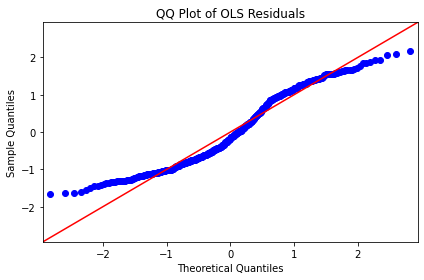

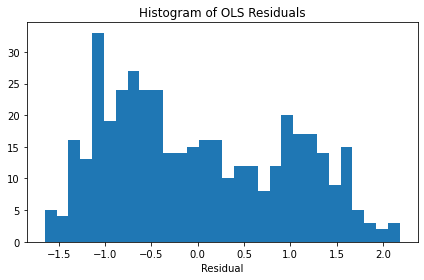

In [ ]:
# Residuals vs Fitted Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

ols_model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = ols_model.resid

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of OLS Residuals")
plt.tight_layout()
plt.show()

# Residual Histogram
plt.hist(residuals, bins=30)
plt.title("Histogram of OLS Residuals")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()

## SHAP Summary Plot for Random Forest

Detected regressor or unified output.


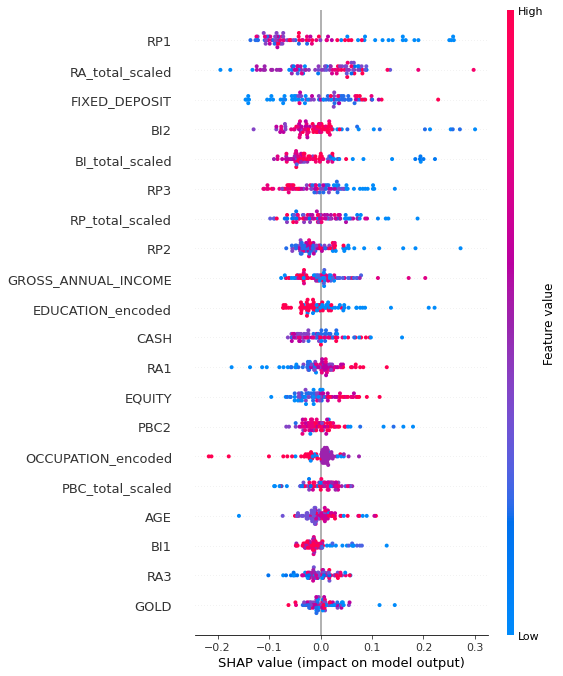

In [ ]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Handle classifier (list output) vs regressor (array)
if isinstance(shap_values, list):
    print(f"Detected classifier with {len(shap_values)} classes.")
    shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
else:
    print("Detected regressor or unified output.")
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


## LIME Interpretation Weights Summary

In [ ]:
import lime
import lime.lime_tabular

# Create LIME explainer for regression
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    mode='regression'
)

# Pick a test instance
i = 0
exp = explainer.explain_instance(X_test.iloc[i].values, rf_model.predict, num_features=10)

# Display explanation
exp.show_in_notebook(show_table=True)

# Optional: Save as HTML
exp.save_to_file('lime_explanation_instance_0_regression.html')





## Model Justification & Conclusion

In [60]:
print
("""
Random Forest was ultimately selected due to its ability to model non-linear interactions, superior performance on cross-validation, and compatibility with SHAP and LIME explainability tools. While OLS and Ridge provided interpretable baselines, their low R² scores (< 0.1) made them less suitable. Polynomial regression exhibited overfitting. 

Recommendation: Proceed with Random Forest for production but optimize via GridSearchCV and test further for generalizability.
""")

'\nRandom Forest was ultimately selected due to its ability to model non-linear interactions, superior performance on cross-validation, and compatibility with SHAP and LIME explainability tools. While OLS and Ridge provided interpretable baselines, their low R² scores (< 0.1) made them less suitable. Polynomial regression exhibited overfitting. \n\nRecommendation: Proceed with Random Forest for production but optimize via GridSearchCV and test further for generalizability.\n'